In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [3]:
np.random.seed(2)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [67]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [6]:
sns.set(style='white', context='notebook', palette='deep')

In [9]:
# Load data
train = pd.read_csv(r'E:\Open Source Dataset Code\Dataset\MNIST\train.csv')
test = pd.read_csv(r'E:\Open Source Dataset Code\Dataset\MNIST\test.csv')

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

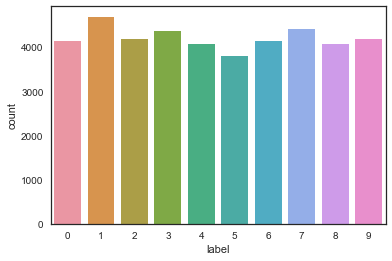

In [10]:
Y_train = train['label']
# Drop 'label' column
X_train = train.drop(labels=['label'], axis=1)
# free some space
del train

g = sns.countplot(Y_train)
Y_train.value_counts()

In [11]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [12]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [13]:
# Normalization
X_train /= 255.0
test /= 255.0

In [14]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [15]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes=10)

In [16]:
# Set the random seed
random_seed = 2
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=random_seed)

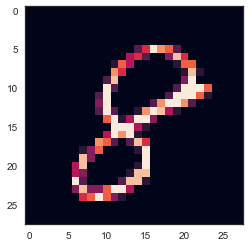

In [30]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [83]:
model = Sequential()
model.add(Conv2D(32, (5, 5), padding='Same', input_shape=(28, 28, 1)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (5, 5), padding='same'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='Same'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='Same'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2), (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [84]:
# Compile the optimizer
optimizer = RMSprop()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
lr_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [86]:
epochs = 30
batch_size = 128

In [87]:
# With data augmentation to prevent overfitting
data_gen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
    )
data_gen.fit(X_train)

In [88]:
# Fit the model
history = model.fit_generator(data_gen.flow(X_train, Y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(X_val, Y_val),
                              verbose=2, steps_per_epoch=X_train.shape[0]//batch_size,
                              callbacks=[lr_reduction])

Epoch 1/30


147s - loss: 0.4965 - acc: 0.8388 - val_loss: 0.0601 - val_acc: 0.9814
Epoch 2/30


147s - loss: 0.1511 - acc: 0.9553 - val_loss: 0.0415 - val_acc: 0.9855
Epoch 3/30


151s - loss: 0.1117 - acc: 0.9674 - val_loss: 0.0332 - val_acc: 0.9888
Epoch 4/30


152s - loss: 0.0908 - acc: 0.9725 - val_loss: 0.0341 - val_acc: 0.9898
Epoch 5/30


151s - loss: 0.0794 - acc: 0.9760 - val_loss: 0.0415 - val_acc: 0.9886
Epoch 6/30


145s - loss: 0.0737 - acc: 0.9782 - val_loss: 0.0348 - val_acc: 0.9893
Epoch 7/30


141s - loss: 0.0729 - acc: 0.9793 - val_loss: 0.0273 - val_acc: 0.9926
Epoch 8/30


137s - loss: 0.0666 - acc: 0.9806 - val_loss: 0.0305 - val_acc: 0.9912
Epoch 9/30


139s - loss: 0.0630 - acc: 0.9817 - val_loss: 0.0265 - val_acc: 0.9929
Epoch 10/30


139s - loss: 0.0616 - acc: 0.9816 - val_loss: 0.0227 - val_acc: 0.9931
Epoch 11/30


139s - loss: 0.0603 - acc: 0.9820 - val_loss: 0.0247 - val_acc: 0.9921
Epoch 12/30


138s - loss: 0.0604 - acc: 0.9827 - val_loss: 0.0215 - val_acc: 0.9938
Epoch 13/30


138s - loss: 0.0603 - acc: 0.9828 - val_loss: 0.0171 - val_acc: 0.9950
Epoch 14/30


138s - loss: 0.0604 - acc: 0.9828 - val_loss: 0.0226 - val_acc: 0.9936
Epoch 15/30


138s - loss: 0.0599 - acc: 0.9835 - val_loss: 0.0205 - val_acc: 0.9938
Epoch 16/30


137s - loss: 0.0622 - acc: 0.9828 - val_loss: 0.0147 - val_acc: 0.9952
Epoch 17/30


137s - loss: 0.0585 - acc: 0.9838 - val_loss: 0.0528 - val_acc: 0.9860
Epoch 18/30


138s - loss: 0.0600 - acc: 0.9832 - val_loss: 0.0231 - val_acc: 0.9931
Epoch 19/30


138s - loss: 0.0614 - acc: 0.9827 - val_loss: 0.0225 - val_acc: 0.9938
Epoch 20/30



Epoch 00019: reducing learning rate to 0.0005000000237487257.
138s - loss: 0.0622 - acc: 0.9834 - val_loss: 0.0267 - val_acc: 0.9936
Epoch 21/30


137s - loss: 0.0479 - acc: 0.9860 - val_loss: 0.0233 - val_acc: 0.9936
Epoch 22/30


137s - loss: 0.0462 - acc: 0.9878 - val_loss: 0.0186 - val_acc: 0.9945
Epoch 23/30



Epoch 00022: reducing learning rate to 0.0002500000118743628.
137s - loss: 0.0486 - acc: 0.9864 - val_loss: 0.0150 - val_acc: 0.9945
Epoch 24/30


137s - loss: 0.0378 - acc: 0.9891 - val_loss: 0.0145 - val_acc: 0.9957
Epoch 25/30


138s - loss: 0.0379 - acc: 0.9890 - val_loss: 0.0144 - val_acc: 0.9957
Epoch 26/30


138s - loss: 0.0387 - acc: 0.9890 - val_loss: 0.0179 - val_acc: 0.9957
Epoch 27/30


138s - loss: 0.0371 - acc: 0.9896 - val_loss: 0.0159 - val_acc: 0.9948
Epoch 28/30



Epoch 00027: reducing learning rate to 0.0001250000059371814.
138s - loss: 0.0365 - acc: 0.9894 - val_loss: 0.0166 - val_acc: 0.9950
Epoch 29/30


138s - loss: 0.0343 - acc: 0.9906 - val_loss: 0.0169 - val_acc: 0.9957
Epoch 30/30


138s - loss: 0.0304 - acc: 0.9913 - val_loss: 0.0159 - val_acc: 0.9962


# Evaluate the model
## Training and validation curves

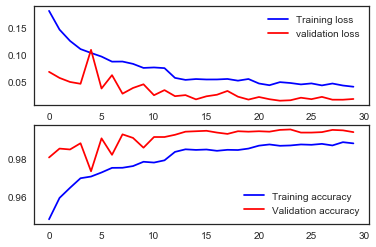

In [79]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend0 = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend1 = ax[1].legend(loc='best', shadow=True)

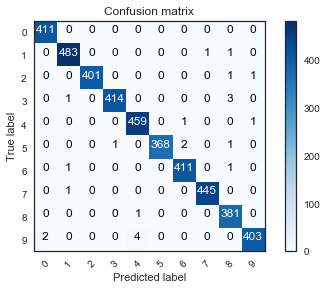

In [81]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, cm[i,j],
            horizontalalignment='center',
            color='white' if cm[i,j] > thresh else 'black'
        )
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis=1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(10))
    

In [44]:
Y_pred.shape

(4200, 10)

In [54]:
Y_true[0]

6

In [53]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)
# Select those wrong predictions
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

In [55]:
Y_pred_errors[0]

array([  3.13138496e-03,   9.66084248e-04,   6.60177246e-02,
         2.04717472e-01,   5.57901629e-04,   6.13303343e-03,
         3.03692669e-02,   1.09489448e-02,   6.76427603e-01,
         7.30644155e-04], dtype=float32)

In [59]:
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1


In [60]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

In [61]:
# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

In [64]:
# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

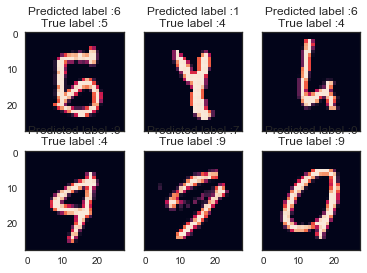

In [65]:
# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [75]:
X_train.shape

(37800, 28, 28, 1)

In [89]:
# Predict results
results = model.predict(test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name='Label')
submission = pd.concat([pd.Series(range(1, 28001), name='ImageId'), results], axis=1)
submission.to_csv('LeNet_MNIST_datagen.csv', index=False)